In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/montcoalert/911.csv


In [72]:
df=pd.read_csv('/kaggle/input/montcoalert/911.csv')

In [73]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [74]:
df.shape

(663522, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [76]:
df['zip'].value_counts() 

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
           ...  
77316.0        1
19134.0        1
19135.0        1
8502.0         1
18938.0        1
Name: count, Length: 204, dtype: int64

In [77]:
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [78]:
df['title'].nunique()

148

In [79]:
#What were the unique reasons for the calls?
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [80]:
x=df['title'].iloc[0]
x.split(':')
x.split(':')[0]
df['reason']=df['title'].apply(lambda x:x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [81]:
df['reason'].value_counts()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

In [82]:
df['timeStamp'].iloc[0]
type(df['timeStamp'].iloc[0])
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [83]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour) 
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time:time.dayofweek)
df['year'] = df['timeStamp'].apply(lambda time:time.year)

In [84]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,DayofWeek,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015


In [85]:
time = df['timeStamp'].iloc[0]
time.hour
time.dayofweek
time.year
time.dayofyear

344

<Axes: xlabel='DayofWeek', ylabel='count'>

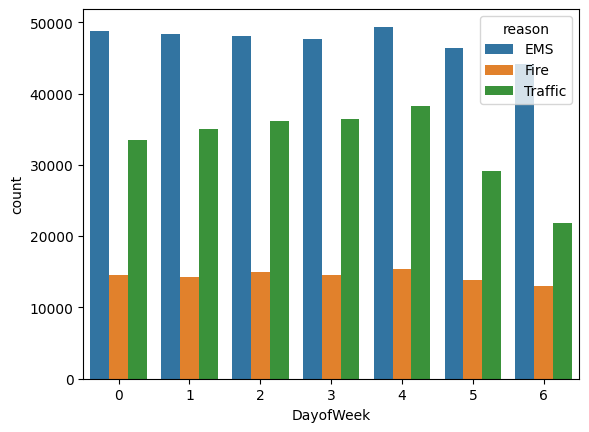

In [86]:
import seaborn as sns
sns.countplot(x='DayofWeek',data=df,hue='reason')

In [87]:
#1-How many Calls were from Norristown
df[df['twp'] == "NORRISTOWN"].count().iloc[0]

37633

In [88]:
#2-How many emergency titles were about dizziness
def DoesContainDizziness(word):
    if "DIZZINESS" in word:
        return True
    return False
sum(df['title'].apply(lambda e: DoesContainDizziness(e)))


5155

In [89]:
#3-How many emergency calls were made in the first half of the year
df[df["Month"] < 6].count().iloc[0]

288970

In [90]:
#4-How many emergency calls were made in the first half of the year
if (df[df["Hour"] > 12].count().iloc[0]) > (df[df["Hour"] < 12].count().iloc[0]):
    print("Most of the calls were made after 12pm")
else:
    print("Most of the calls were made before 12pm")

Most of the calls were made after 12pm


In [91]:
#5-How many calls were made for each emergency reasons
df.groupby('reason').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,DayofWeek,year
reason,,,,,,,,,,,,,
EMS,332692,332692,332692,304855,332692,332692,332480,332692,332692,332692,332692,332692,332692
Fire,100622,100622,100622,88867,100622,100622,100545,100622,100622,100622,100622,100622,100622
Traffic,230208,230208,230208,189601,230208,230208,230204,230208,230208,230208,230208,230208,230208
